# Resolution parameter on Sierpinski

In [1]:
# Install matplotlib (usually comes with Anaconda/Jupyter, but good to ensure)
%pip install matplotlib --quiet

# Install igraph
%pip install igraph --quiet
%pip install ipywidgets --quiet
%pip install --upgrade ipywidgets matplotlib python-igraph --quiet
%pip install colorcet --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [3]:
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.cm as cm 
import matplotlib.colors as mcolors
import colorcet as cc

In [4]:
# Global state for node mapping (needed because igraph uses integer IDs)
_coord_to_id = {}
_coords_list = [] # Stores (x, y) tuples in order of their assigned ID
_next_id = 0

def _get_or_create_vertex(G, coord):
    """
    Helper function to get the igraph vertex ID for a given coordinate.
    If the coordinate doesn't exist, it creates a new vertex in G and assigns an ID.
    """
    global _coord_to_id, _coords_list, _next_id
    coord_tuple = tuple(coord) # Ensure the coordinate is a hashable tuple

    if coord_tuple not in _coord_to_id:
        _coord_to_id[coord_tuple] = _next_id
        _coords_list.append(coord_tuple)
        G.add_vertex() # Add a new vertex to the igraph graph
        _next_id += 1
    return _coord_to_id[coord_tuple]

def _sierpinski_igraph(G, p1, p2, p3, depth):
    """
    Recursive function to build the Sierpiński triangle structure in an igraph Graph.
    This function uses integer IDs for vertices after mapping from coordinates.
    """
    if depth == 0:
        id1 = _get_or_create_vertex(G, p1)
        id2 = _get_or_create_vertex(G, p2)
        id3 = _get_or_create_vertex(G, p3)
        if not G.are_adjacent(id1, id2): G.add_edge(id1, id2)
        if not G.are_adjacent(id2, id3): G.add_edge(id2, id3)
        if not G.are_adjacent(id3, id1): G.add_edge(id3, id1)
    else:
        a = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
        b = ((p2[0]+p3[0])/2, (p2[1]+p3[1])/2)
        c = ((p3[0]+p1[0])/2, (p3[1]+p1[1])/2)
        _sierpinski_igraph(G, p1, a, c, depth-1)
        _sierpinski_igraph(G, a, p2, b, depth-1)
        _sierpinski_igraph(G, c, b, p3, depth-1)

def draw_sierpinski_igraph_on_axes(depth, ax):
    """
    Generates and draws a Sierpiński triangle using igraph onto a given Matplotlib Axes.
    """
    global _coord_to_id, _coords_list, _next_id
    
    _coord_to_id = {}
    _coords_list = []
    _next_id = 0

    G = ig.Graph()
    p1, p2, p3 = (0, 0), (1, 0), (0.5, np.sqrt(3)/2) 
    _sierpinski_igraph(G, p1, p2, p3, depth)

    ax.clear()

    if not G.vcount():
        ax.set_title(f"Sierpiński Triangle - Depth {depth} (No vertices)")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.axis('off')
        return

    layout = _coords_list
    ig.plot(G, target=ax, layout=layout, vertex_size=5, vertex_color="black",    
            vertex_label=None, edge_color="blue", edge_width=1,
            bbox=(0, 0, 600, 600), margin=20)
    
    ax.set_title(f"Sierpiński Triangle - Depth {depth}")
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

In [5]:
# Global state for node mapping (needed because igraph uses integer IDs)
_coord_to_id = {}
_coords_list = [] # Stores (x, y) tuples in order of their assigned ID
_next_id = 0

def _get_or_create_vertex(G, coord):
    """
    Helper function to get the igraph vertex ID for a given coordinate.
    If the coordinate doesn't exist, it creates a new vertex in G and assigns an ID.
    """
    global _coord_to_id, _coords_list, _next_id
    coord_tuple = tuple(coord) # Ensure the coordinate is a hashable tuple

    if coord_tuple not in _coord_to_id:
        _coord_to_id[coord_tuple] = _next_id
        _coords_list.append(coord_tuple)
        G.add_vertex() # Add a new vertex to the igraph graph
        _next_id += 1
    return _coord_to_id[coord_tuple]

def _sierpinski_igraph_builder(G, p1, p2, p3, depth):
    """
    Recursive function to build the Sierpiński triangle structure in an igraph Graph.
    This function uses integer IDs for vertices after mapping from coordinates.
    """
    if depth == 0:
        id1 = _get_or_create_vertex(G, p1)
        id2 = _get_or_create_vertex(G, p2)
        id3 = _get_or_create_vertex(G, p3)
        if not G.are_adjacent(id1, id2): G.add_edge(id1, id2)
        if not G.are_adjacent(id2, id3): G.add_edge(id2, id3)
        if not G.are_adjacent(id3, id1): G.add_edge(id3, id1)
    else:
        a = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
        b = ((p2[0]+p3[0])/2, (p2[1]+p3[1])/2)
        c = ((p3[0]+p1[0])/2, (p3[1]+p1[1])/2)
        _sierpinski_igraph_builder(G, p1, a, c, depth-1)
        _sierpinski_igraph_builder(G, a, p2, b, depth-1)
        _sierpinski_igraph_builder(G, c, b, p3, depth-1)

def get_sierpinski_graph_and_layout(depth):
    """
    Generates a Sierpiński triangle graph and its coordinate layout.
    Returns the igraph.Graph object and the list of (x,y) coordinates for its layout.
    """
    global _coord_to_id, _coords_list, _next_id
    
    _coord_to_id = {}
    _coords_list = []
    _next_id = 0

    G = ig.Graph()
    p1, p2, p3 = (0, 0), (1, 0), (0.5, np.sqrt(3)/2) 
    _sierpinski_igraph_builder(G, p1, p2, p3, depth)

    if not G.vcount():
        print(f"Warning: Sierpiński graph at depth {depth} has no vertices.")
        return G, [] # Return empty layout if no vertices

    return G, _coords_list

# --- Leiden Clustering and Plotting Function ---

def plot_leiden_communities_on_axes(graph, layout, resolution, ax, title_suffix=""):
    """
    Clusters a given graph using Leiden with a specified resolution and plots it
    onto the provided Matplotlib Axes, coloring vertices by community.
    """
    ax.clear() # Clear the axes for the new plot

    communities = graph.community_leiden(objective_function="modularity", resolution=resolution)
    
    num_communities = len(communities)

    palette = cc.glasbey_dark
    vertex_colors = [palette[membership_id % len(palette)] for membership_id in communities.membership]

    # Handle case where there are no communities or no vertices (though Leiden usually finds at least 1)
    if not vertex_colors and graph.vcount() > 0:
        vertex_colors = ["lightgray"] * graph.vcount()
    elif graph.vcount() == 0:
        ax.set_title(f"Sierpiński Triangle - No vertices (Depth {SIERPINSKI_DEPTH})")
        ax.axis('off')
        return

    ig.plot(
        graph,
        target=ax,
        layout=layout,
        vertex_size=50,           # Adjust node size (smaller for higher depth for clarity)
        vertex_color=vertex_colors, # Use community-assigned colors
        vertex_label=None,       # No labels for vertices
        edge_color="black",       # Edge color (can be made less prominent)
        edge_width=1.5,
        bbox=(0, 0, 600, 600),   # Bounding box for the internal renderer
        margin=20,               # Margin around the plot area
    )
    
    # Set plot title to indicate resolution and number of communities
    ax.set_title(f"Resolution: {resolution:.3f} ({num_communities} comms) {title_suffix}")
    ax.set_aspect('equal', adjustable='box') # Ensure the aspect ratio is 1:1
    ax.set_xticks([]) # Remove x-axis ticks
    ax.set_yticks([]) # Remove y-axis ticks
    ax.axis('off')    # Turn off axis lines and labels completely


Generated Sierpiński Graph (Depth 3):
  Vertices: 42
  Edges: 81


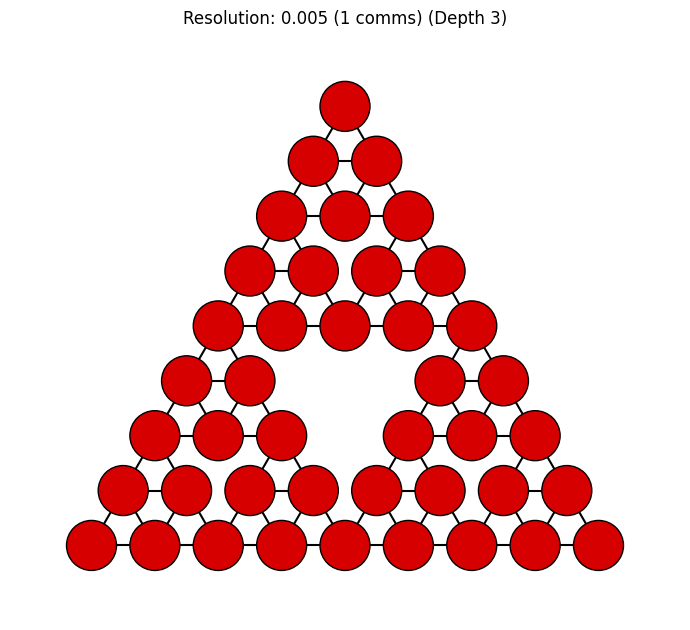

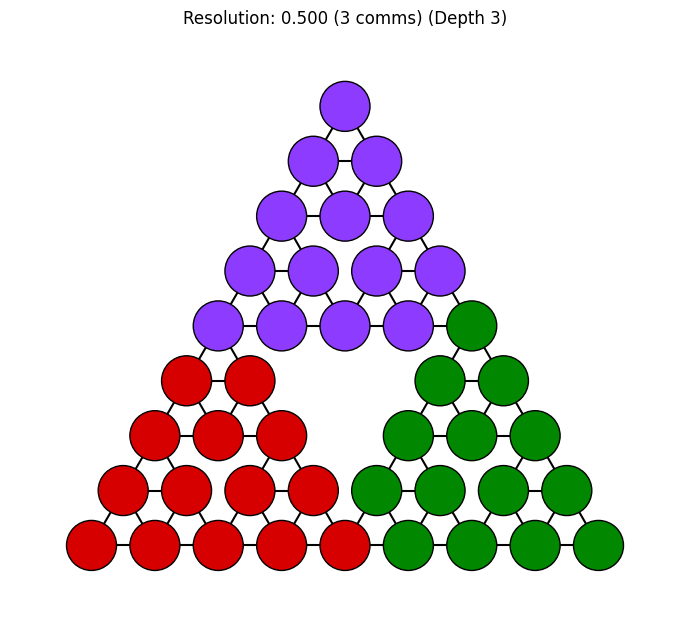

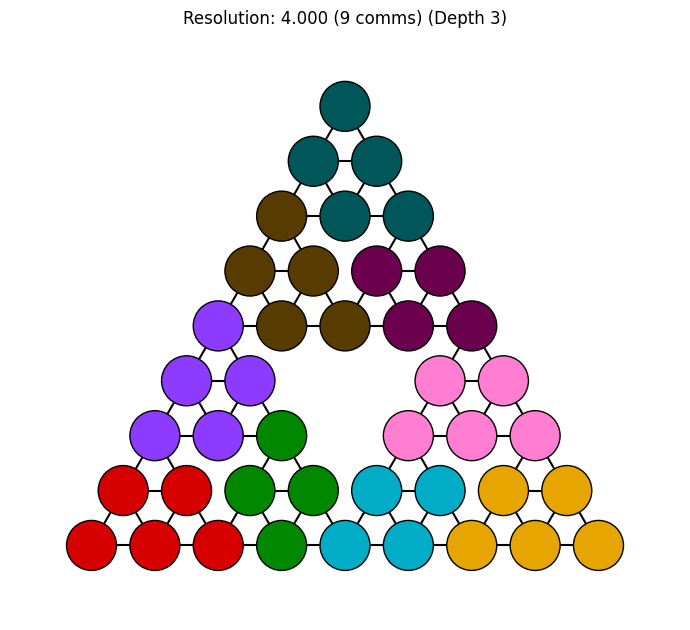

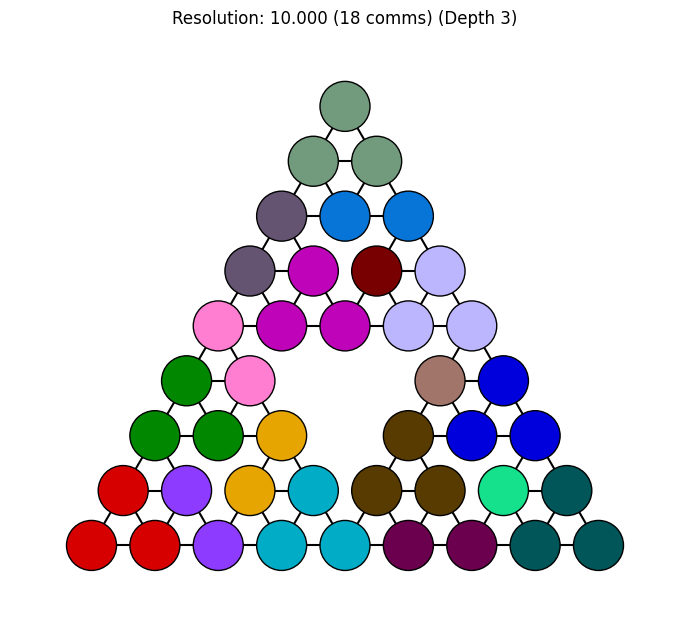

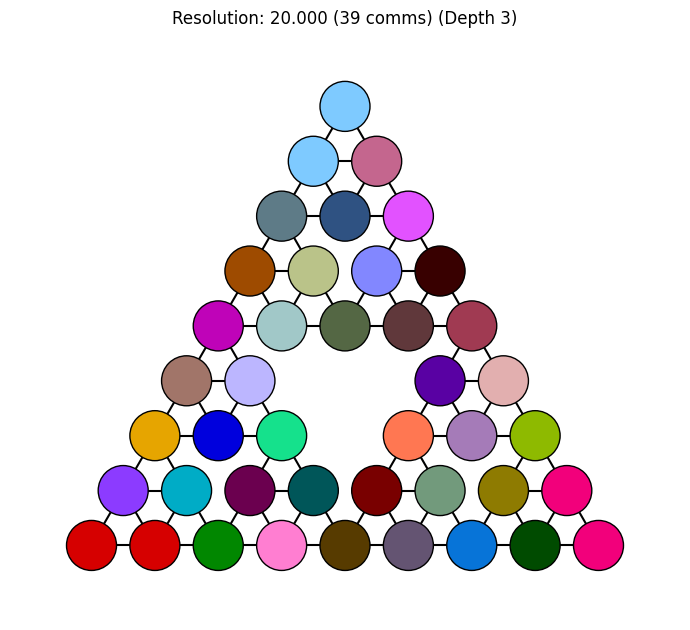

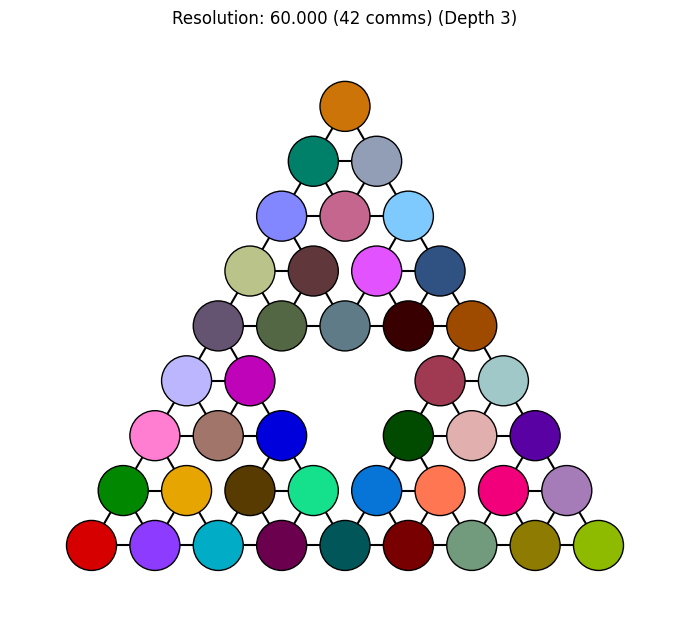


Sierpiński Graph with Leiden Communities (varying resolution):


In [6]:
def create_interactive_resolution_param_tabs():
    # --- Main Tabbed Interface for Leiden Resolutions ---
    
    # 1. Generate the Sierpiński graph (depth 3) ONCE
    # This graph will be reused for all resolution settings.
    SIERPINSKI_DEPTH = 3
    sierpinski_graph, sierpinski_layout = get_sierpinski_graph_and_layout(SIERPINSKI_DEPTH)
    
    print(f"Generated Sierpiński Graph (Depth {SIERPINSKI_DEPTH}):")
    print(f"  Vertices: {sierpinski_graph.vcount()}")
    print(f"  Edges: {sierpinski_graph.ecount()}")
    
    # Define a set of resolution parameters to display in different tabs
    resolution_values = [0.005, 0.5, 4, 10, 20, 60] # Example resolution values
    
    # Create an Output widget for each resolution value. Each Output widget will hold one plot.
    output_widgets = [widgets.Output() for _ in resolution_values]
    
    # Populate the content for each tab
    tab_titles = []
    for i, res in enumerate(resolution_values):
        with output_widgets[i]: # Direct output to the current Output widget
            fig, ax = plt.subplots(figsize=(7, 7)) # Create a new figure and axes for this tab's plot
            
            # Call the plotting function with the pre-generated graph and layout,
            # and the current resolution parameter.
            plot_leiden_communities_on_axes(
                sierpinski_graph,
                sierpinski_layout,
                resolution=res,
                ax=ax,
                title_suffix=f"(Depth {SIERPINSKI_DEPTH})" # Optional suffix for the title
            )
            plt.tight_layout() # Adjust layout to prevent labels/titles from overlapping
            plt.show() # Display the Matplotlib figure within this Output widget
        
        tab_titles.append(f"Res: {res:.3f}") # Store the title for this tab
    
    # 4. Create the Tab widget
    leiden_tabs = widgets.Tab()
    leiden_tabs.children = output_widgets # Assign the list of Output widgets as children
    
    # 5. Set the titles for each tab
    for i, title in enumerate(tab_titles):
        leiden_tabs.set_title(i, title)
    
    # 6. Display the Tab widget in your Jupyter Notebook
    print("\nSierpiński Graph with Leiden Communities (varying resolution):")
    display(leiden_tabs)

create_interactive_resolution_param_tabs()